# Lendo o CSV e criando o dataset


In [2]:
import pandas as pd
import csv

#path = 'C:\\Users\\luizjr\\REPOS\\ADA_TECH\\FORMACAO\MODULO_06\\bodyfat.csv'
path = 'C:\\Users\\Sadinoel31\\Documents\\#IFOOD ADA PYTHON\\Estatística\\trabalho\\bodyfat.csv'


df = pd.read_csv(path, delimiter=',', encoding='latin1')

df = pd.DataFrame(df)

nomes_em_portugues= {
    'Density': 'Densidade',
    'BodyFat': 'GorduraCorp',
    'Age': 'Idade',
    'Weight': 'Peso',
    'Height': 'Altura',
    'Neck': 'Pescoço',
    'Chest': 'Peito',
    'Abdomen': 'Abdômen',
    'Hip': 'Quadril',
    'Thigh': 'Coxa',
    'Knee': 'Joelho',
    'Ankle': 'Tornozelo',
    'Biceps': 'Bíceps',
    'Forearm': 'Antebraço',
    'Wrist': 'Pulso'
}

df = df.rename(columns=nomes_em_portugues)
df['Peso'] = df['Peso'].astype(float)
df['Peso'] = df['Peso'] * 0.45359237
#Peso em kg e os outros em cm 
# print(df.to_string(index=False))
df

,Densidade,GorduraCorp,Idade,Peso,Altura,Pescoço,Peito,Abdômen,Quadril,Coxa,Joelho,Tornozelo,Bíceps,Antebraço,Pulso
0,1.0708,12.3,23,69.966623,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,78.584878,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,69.853225,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,83.801190,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,83.574394,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,60.894776,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,91.172066,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,84.708375,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,86.522745,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


# Selecionando as colunas que serão trabalhadas

Observando também as métricas de posição e dispersão para todas as colunas

In [3]:
colunas_escolhidas= ['GorduraCorp', 'Peso', 'Abdômen', 'Quadril', 'Altura','Idade', 'Pescoço']
dados_limpos = df[colunas_escolhidas].dropna()
dados_limpos = dados_limpos.astype(float)
medidas_gerais = dados_limpos.describe()

print(medidas_gerais)

       GorduraCorp        Peso     Abdômen     Quadril      Altura  \
count   252.000000  252.000000  252.000000  252.000000  252.000000   
mean     19.150794   81.158745   92.555952   99.904762   70.148810   
std       8.368740   13.330699   10.783077    7.164058    3.662856   
min       0.000000   53.750696   69.400000   85.000000   29.500000   
25%      12.475000   72.121187   84.575000   95.500000   68.250000   
50%      19.200000   80.059053   90.950000   99.300000   70.000000   
75%      25.300000   89.357697   99.325000  103.525000   72.250000   
max      47.500000  164.722069  148.100000  147.700000   77.750000   

            Idade     Pescoço  
count  252.000000  252.000000  
mean    44.884921   37.992063  
std     12.602040    2.430913  
min     22.000000   31.100000  
25%     35.750000   36.400000  
50%     43.000000   38.000000  
75%     54.000000   39.425000  
max     81.000000   51.200000  


# Questão 1

### a) Para as colunas que você escolher, mostre-me as métricas de posição e de dispersão que julgar interessantes.



Analisamos gordura corporal, peso, abdômen, quadril e pescoço por métricas de posição(Quartis, Mediana, Média, Moda).  
Criamos também a coluna Faixa Etária e por fim, analisamos a gordura corporal por faixa etária através de métricas de dispersão: variância e desvio padrão

In [9]:
medidas_posicao = dados_limpos.describe()
medidas_posicao.drop('Idade', axis=1, inplace=True)
medidas_posicao.drop('Altura', axis=1, inplace=True)


moda = dados_limpos.mode().iloc[0]
resultados = pd.DataFrame()
resultados['25%'] = medidas_posicao.loc['25%']
resultados['50%'] = medidas_posicao.loc['50%']
resultados['75%'] = medidas_posicao.loc['75%']
resultados['Média'] = medidas_posicao.loc['mean']
resultados['Moda'] = moda

print(resultados)

                   25%        50%         75%      Média       Moda
GorduraCorp  12.475000  19.200000   25.300000  19.150794       20.4
Peso         72.121187  80.059053   89.357697  81.158745  69.059438
Abdômen      84.575000  90.950000   99.325000  92.555952       88.7
Quadril      95.500000  99.300000  103.525000  99.904762       98.3
Pescoço      36.400000  38.000000   39.425000  37.992063       38.5


In [10]:
#Coluna Faixa Etária e GorduraCorporal
faixas_de_idade = [0, 30, 40, 50, 60, 70, 80]

dados_limpos['Faixa Etária'] = pd.cut(dados_limpos['Idade'], bins=faixas_de_idade)
quartis_por_faixa_de_idade = dados_limpos.groupby('Faixa Etária')['GorduraCorp'].describe()[['25%', '50%', '75%']]
media_faixa_de_idade = dados_limpos.groupby('Faixa Etária')['GorduraCorp'].mean()
moda_faixa_de_idade = dados_limpos.groupby('Faixa Etária')['GorduraCorp'].apply(lambda x: x.mode().iloc[0])
resultados_por_faixa_etaria = pd.concat([quartis_por_faixa_de_idade, media_faixa_de_idade, moda_faixa_de_idade], axis=1)
resultados_por_faixa_etaria.columns = ['25%', '50%', '75%', 'Média', 'Moda']

print(resultados_por_faixa_etaria)

                 25%    50%     75%      Média  Moda
Faixa Etária                                        
(0, 30]        9.400  12.45  19.200  14.368421   3.7
(30, 40]      11.950  17.60  22.475  17.244444  16.5
(40, 50]      15.975  20.45  25.650  20.767857  20.4
(50, 60]      12.400  15.40  25.200  18.373171   8.8
(60, 70]      18.575  25.30  28.250  23.814286  11.0
(70, 80]      26.250  28.15  31.250  27.116667  14.9


In [8]:
#Variância e desvio padrão para GorduraCorp e  Faixa etária 
variancia_faixa_de_idade = dados_limpos.groupby('Faixa Etária')['GorduraCorp'].var()
desvio_padrao_faixa_de_idade = dados_limpos.groupby('Faixa Etária')['GorduraCorp'].std()

resultados_dispersao_por_faixa_etaria = pd.concat([variancia_faixa_de_idade, desvio_padrao_faixa_de_idade], axis=1)
resultados_dispersao_por_faixa_etaria.columns = ['Variância', 'Desvio Padrão']

print(resultados_dispersao_por_faixa_etaria)

              Variância  Desvio Padrão
Faixa Etária                          
(0, 30]       54.974651       7.414489
(30, 40]      56.259874       7.500658
(40, 50]      67.639798       8.224342
(50, 60]      81.899512       9.049835
(60, 70]      42.514603       6.520322
(70, 80]      44.037667       6.636088


### b) Faça um pré-julgamento a respeito das colunas deste dataset tentando encontrar um par de colunas que, pela lógica, deve ser altamente correlacionado e outro par de colunas que, pela lógica, deve ser fracamente correlacionado. Depois utilize as métricas de correlação que você aprendeu para pôr à prova essas suas opiniões, isto é, para descobrir se matemática confirma suas crenças iniciais ou não.

O par de colunas altamente correlacionado seria GorduraCorp e Abdômen, pela hipótese de que se a gordura corporal aumenta, a circunferência abdominal deve aumentar também. E o par fracamente correlacionado seria GorduraCorp e Idade, levando em consideração que a gordura corporal não deve aumentar com a idade, essas medidas devem variar.

##### Gráficos ilustrativos

No gráfico abaixo, inserimos a Linha de Regressão, que é a representação da relação entre duas variáveis: gordura corporal e abdômen. À medida que a circunferência abdominal aumenta, a gordura corporal também aumenta, ou seja aponta para uma relação direta, positiva entre elas e os pontos agrupados em torno da linha indicam uma correlação  forte. 
Depois analisamos a relação entre gordura corporal e faixa etária, trazendo as métricas de posição e dispersão. A dispersão dos dados muda conforme o grupo, os valores de gordura corporal estão mais dispersos dentro das faixas etárias, uma maior variância. 
Por fim, podemos utilizar o coeficiente da correlação de Pearson para teste, quanto mais próximo de 1 mais forte a correlação. 
Logo validamos matematicamente nossas hipóteses iniciais. 

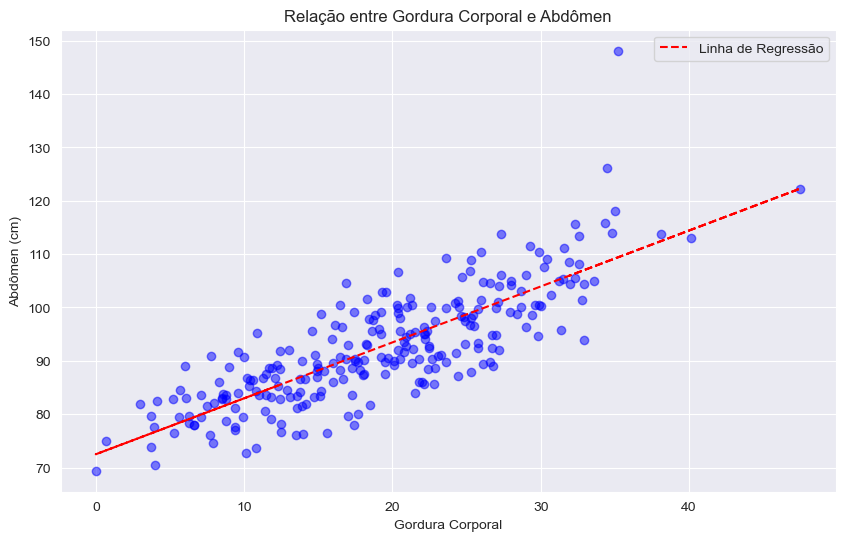

In [15]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

gordura_corporal = dados_limpos['GorduraCorp']
abdomen = dados_limpos['Abdômen']

slope, intercept, _, _, _ = linregress(gordura_corporal, abdomen)
line = slope * gordura_corporal + intercept

plt.figure(figsize=(10, 6))
plt.scatter(gordura_corporal, abdomen, color='blue', alpha=0.5)
plt.plot(gordura_corporal, line, color='red', linestyle='--', label='Linha de Regressão')
plt.title('Relação entre Gordura Corporal e Abdômen')
plt.xlabel('Gordura Corporal')
plt.ylabel('Abdômen (cm)')
plt.legend()
plt.grid(True)
plt.show()

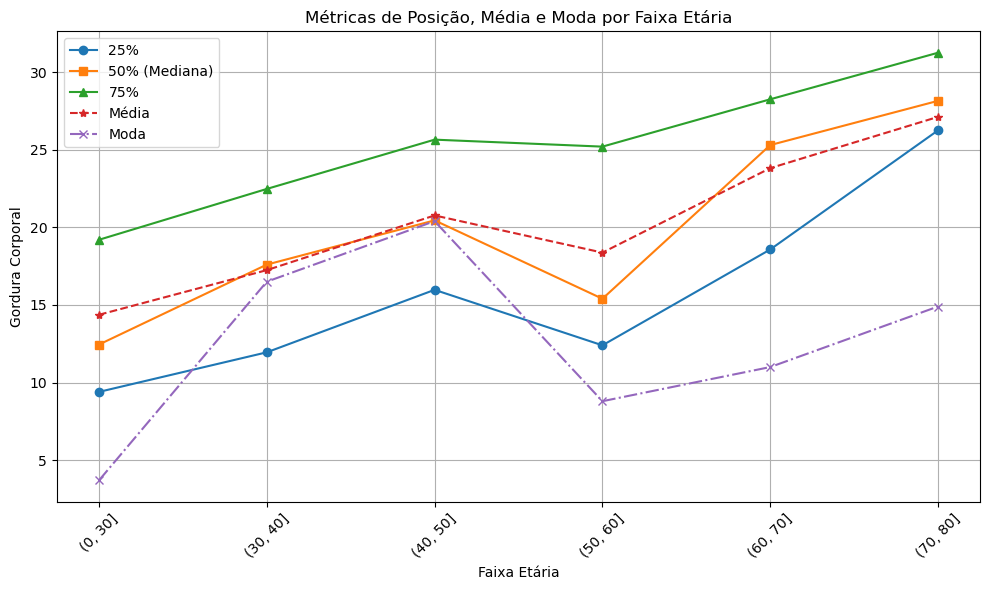

In [24]:
import matplotlib.pyplot as plt

faixas_etarias = resultados_por_faixa_etaria.index.astype(str)

dados_plot = resultados_por_faixa_etaria[['25%', '50%', '75%', 'Média', 'Moda']].values.T

plt.figure(figsize=(10, 6))
plt.plot(faixas_etarias, dados_plot[0], marker='o', label='25%')
plt.plot(faixas_etarias, dados_plot[1], marker='s', label='50% (Mediana)')
plt.plot(faixas_etarias, dados_plot[2], marker='^', label='75%')
plt.plot(faixas_etarias, dados_plot[3], marker='*', label='Média', linestyle='--')
plt.plot(faixas_etarias, dados_plot[4], marker='x', label='Moda', linestyle='-.')
plt.xlabel('Faixa Etária')
plt.ylabel('Gordura Corporal')
plt.title('Métricas de Posição, Média e Moda por Faixa Etária')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

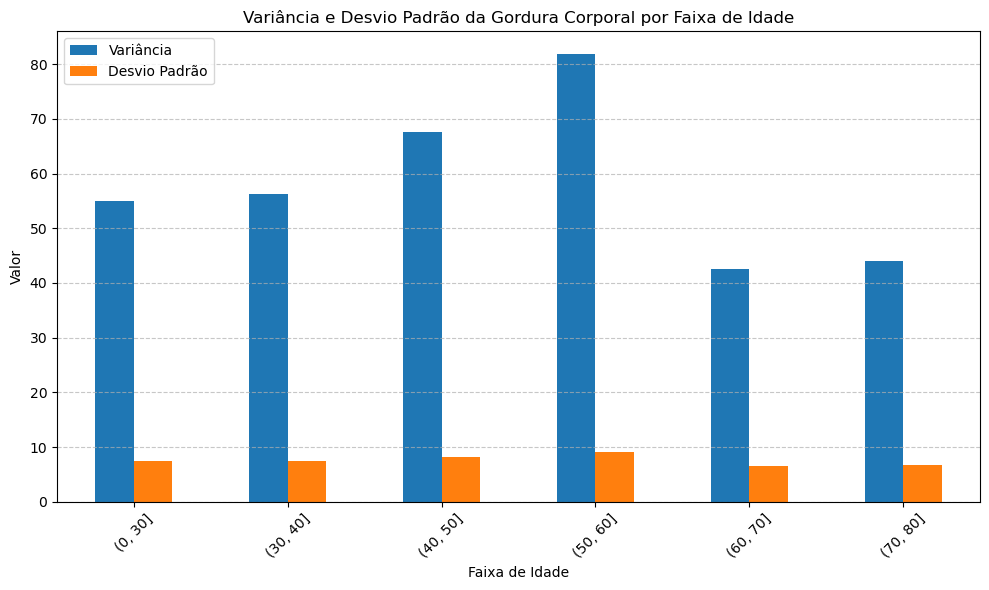

In [26]:
import matplotlib.pyplot as plt

resultados_dispersao_por_faixa_etaria.plot(kind='bar', figsize=(10, 6))
plt.title('Variância e Desvio Padrão da Gordura Corporal por Faixa de Idade')
plt.xlabel('Faixa de Idade')
plt.ylabel('Valor')
plt.xticks(rotation=45) 
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [25]:
#Correlação de Pearson
correlacao_gordcorp_abdomen = dados_limpos['GorduraCorp'].corr(dados_limpos['Abdômen'])
correlacao_gordcorp_idade = dados_limpos['GorduraCorp'].corr(dados_limpos['Idade'])

print("Correlação entre Gordura Corporal e Circunferência Abdominal:", correlacao_gordcorp_abdomen)
print("Correlação entre Gordura Corporal e Idade:", correlacao_gordcorp_idade)

Correlação entre Gordura Corporal e Circunferência Abdominal: 0.8134322847810495
Correlação entre Gordura Corporal e Idade: 0.2914584401352221


### c) Escolha pelo menos uma coluna que siga a distribuição normal, plote um boxplot e explique como você fez para concluir que esta coluna segue uma distribuição normal.

A distribuição normal também chamada de probabilidade contínua, deve ter a média e a mediana aproximadamente iguais, isso faz com que o gráfico tenha uma aparência de sino, simétrico entre as partes em torno da média, ou seja, concentrado no meio e diminuindo nas bordas. Observando as colunas trabalhadas, a coluna GorduraCorp segue essa lógica. Podemos fazer então um histograma para análise da curva, parar mostrar a distribuição de frequência dos dados em um intervalo. Para confirmar, podemos fazer o teste de Shapiro-Wilk. Ele calcula uma estatística de teste, então quanto mais próximo de 1 for o resultado do teste e se o valor p for menor que o nível significância, geralmente 0.05, podemos dizer que os dados seguem uma distribuição normal.

In [21]:
# Média e mediana de Gordura Corporal
media_gordura_corporal = dados_limpos['GorduraCorp'].mean()
mediana_gordura_corporal = dados_limpos['GorduraCorp'].median()
print("Média da GorduraCorp:", media_gordura_corporal)
print("Mediana da GorduraCorp:", mediana_gordura_corporal)

Média da GorduraCorp: 19.150793650793652
Mediana da GorduraCorp: 19.2


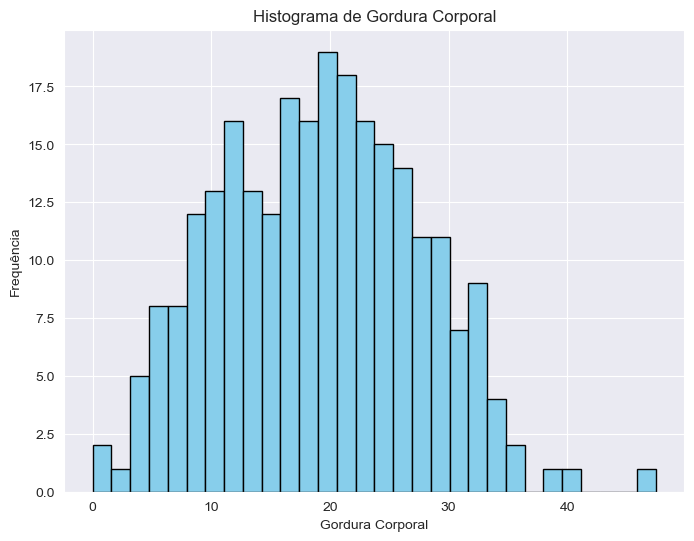

In [23]:
# Histograma
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(dados_limpos['GorduraCorp'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de Gordura Corporal')
plt.xlabel('Gordura Corporal')
plt.ylabel('Frequência')
plt.show()

In [24]:
#Teste de Shapiro Wilk
from scipy.stats import shapiro

stat, p = shapiro(dados_limpos['GorduraCorp'])

print('Estatística de teste:', stat)
print('Valor p:', p)

# Conclusão do teste
alpha = 0.05
if p > alpha:
    print('A amostra parece seguir uma distribuição normal')
else:
    print('A amostra não parece seguir uma distribuição normal')

Estatística de teste: 0.9916779398918152
Valor p: 0.16491423547267914
A amostra parece seguir uma distribuição normal


Boxplot:

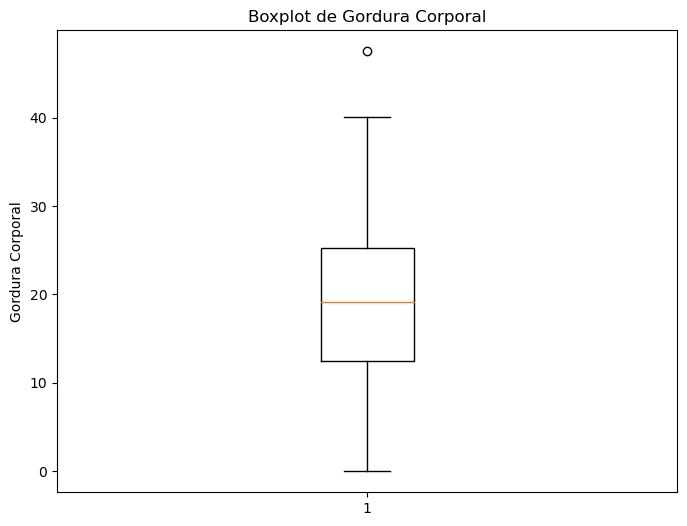

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(dados_limpos['GorduraCorp'])
plt.title('Boxplot de Gordura Corporal')
plt.ylabel('Gordura Corporal')
plt.show()

In [33]:
dados_limpos

,GorduraCorp,Peso,Abdômen,Quadril,Altura,Idade,Pescoço,Faixa Etária
0,12.3,69.966623,85.2,94.5,67.75,23.0,36.2,"(0, 30]"
1,6.1,78.584878,83.0,98.7,72.25,22.0,38.5,"(0, 30]"
2,25.3,69.853225,87.9,99.2,66.25,22.0,34.0,"(0, 30]"
3,10.4,83.801190,86.4,101.2,72.25,26.0,37.4,"(0, 30]"
4,28.7,83.574394,100.0,101.9,71.25,24.0,34.4,"(0, 30]"
...,...,...,...,...,...,...,...,...
247,11.0,60.894776,83.6,88.8,67.00,70.0,34.9,"(60, 70]"
248,33.6,91.172066,105.0,104.5,69.75,72.0,40.9,"(70, 80]"
249,29.3,84.708375,111.5,101.7,66.00,72.0,38.9,"(70, 80]"
250,26.0,86.522745,101.3,97.8,70.50,72.0,38.9,"(70, 80]"


# QUESTÃO 2

### a) Qual é a probabilidade de uma pessoa selecionada ao acaso ter uma idade (coluna Age) superior a 40 anos?

P(idade > 40) = N maior que 40 / N

`Probabilidade de 63.49%`

In [34]:
total_registros = dados_limpos.Idade.count()
maior_40 = dados_limpos.loc[dados_limpos.Idade > 40].Idade.count()

prob_a = maior_40 / total_registros
prob_a = "{:.2%}".format(prob_a)


print(maior_40)
print(total_registros)
print(prob_a)

160
252
63.49%


### b) Qual é a probabilidade de uma pessoa selecionada ao acaso ter um percentual de gordura corporal (coluna BodyFat) superior a 20%?

P(b_fat > 20) = N maior que 20 / N

`Probabilidade de 47.62%`

In [35]:
total_registros = dados_limpos.GorduraCorp.count()
maior_20 = dados_limpos.loc[dados_limpos.GorduraCorp > 20].GorduraCorp.count()

prob_b = maior_20 / total_registros
prob_b = "{:.2%}".format(prob_b)

print(maior_20)
print(total_registros)
print(prob_b)



120
252
47.62%


### c) Qual é a probabilidade de uma pessoa selecionada ao acaso ter um percentual de gordura corporal (coluna BodyFat) superior a 20% e ao mesmo tempo ter uma idade (coluna Age) superior a 40 anos?

P(age > 40 & b_fat > 20) = maior_40_anos_e_20_gordura / maior_40_anos

`Probabilidade de 34.92%`

In [36]:
# Supondo que 'dados' seja o DataFrame contendo os dados
# Filtrando as observações com percentual de gordura corporal superior a 20% e idade superior a 40 anos
filtro = (dados_limpos['GorduraCorp'] > 20) & (dados_limpos['Idade'] > 40)
# print(filtro)
observacoes_filtradas = dados_limpos[filtro]
# print(observacoes_filtradas)


# Calculando a probabilidade
probabilidade = len(observacoes_filtradas) / len(dados_limpos)
print("Probabilidade:", probabilidade)

Probabilidade: 0.3492063492063492


### d) Qual é a probabilidade de uma pessoa selecionada ao acaso ter um percentual de gordura corporal (coluna BodyFat) superior a 20% se eu já souber de antemão que esta pessoa tem uma idade superior a 40 anos?

P(age > 40 & b_fat > 20) = maior_40_anos_e_20_gordura / maior_40_anos

`Probabilidade de 55.00%`

In [37]:
maior_40_anos =  len(dados_limpos[dados_limpos.Idade > 40])

maior_40_anos_e_20_gordura =  len(dados_limpos[(dados_limpos.Idade > 40) & (dados_limpos.GorduraCorp > 20)])

prob_d = maior_40_anos_e_20_gordura / maior_40_anos

prob_d = "{:.2%}".format(prob_d)

print(maior_40_anos)
print(maior_40_anos_e_20_gordura)
print(prob_d)


160
88
55.00%


# QUESTÃO 3

Durante o módulo, nós definimos algumas distribuições de probabilidade, cada uma
com uma função de probabilidade.


### a) Escolha uma delas que não seja uma distribuição normal, e explique (talvez com algum exemplo) que tipos de evento esta distribuição descreve.

R: Poisson: É utilizada pra modelar o número de ocorrências de um evento em um intervalo fixo de tempo ou espaço. 
Dado um número médio de ocorrências, normalmente é usado pra modelar o número de chegadas em um intervalo de tempo, como o número de clientes em uma fila de banco em um determinado tempo.


### b) Explique a utilidade prática das funções de probabilidade. Quero dizer: para quê elas servem? De que modo elas nos ajudam?

R: Em resumo, elas nos fornecem uma estrutura matemática poderosa para entender, modelar e lidar com a incerteza em uma ampla gama de contextos e aplicações.
Ex: teste de hipóteses nos permite tomar decisões sobre uma população com base em informações obtidas de uma amostra

### c) Escolha uma das colunas do nosso dataset que sejam contínuas e que sigam uma distribuição normal, e calcule a probabilidade de uma pessoa escolhida ao acaso ter um valor > x para esta coluna (por exemplo, probabilidade de neck ser maior que 45). Mas, atenção: faça isso usando z-scores, através da função st.norm.cdf, do pacote Python scipy.stats.

R: Probabilidade de uma pessoa escolhida ao acaso ter mais de 25% de gordura corporal:`24,18%`

In [44]:
import numpy as np
from scipy.stats import norm

x = 25

media_gordura_corp = np.mean(dados_limpos.GorduraCorp)
# print(x - media_gordura_corp)
desvio_padrao_gordura_corp = np.std(dados_limpos.GorduraCorp)
# print(desvio_padrao_gordura_corp)

z = (x - media_gordura_corp) / desvio_padrao_gordura_corp
# print(z)
prob_menor_ou_igual_a_x = norm.cdf(z)
# print(prob_menor_ou_igual_a_x)
prob_maior_que_x = 1 - prob_menor_ou_igual_a_x

print(prob_maior_que_x)

0.24186186630110562


# QUESTÃO 4
### Escolha uma coluna de valores contínuos A que seja do seu interesse.
### Depois disso, filtre os registros da sua tabela usando uma segunda coluna B. E, por fim, valendo-se dos seus conhecimentos sobre p-valor, diga se a média de A antes da filtragem é de fato significativamente diferente da média dos valores de A pós filtragem, com um nível de confiança de 95%. Por exemplo: a coluna BodyFat tem uma determinada média geral. Se filtrarmos o nosso dataset para que ele inclua apenas registros com circunferência abdominal (coluna Abdomen) >= 85, certamente a média da coluna BodyFat mudará. Mas, podemos afirmar, com 95% de confiança estatística, que essa média pós-filtragem é, de fato, diferente da média original?


In [72]:
from scipy import stats

media_bodyfat_geral = np.mean(dados_limpos.GorduraCorp)

media_bodyfat_abdome_maior_85 = np.mean(dados_limpos[dados_limpos.Abdômen > 85].GorduraCorp)

print(f'Media de gordura corporal geral: {media_bodyfat_geral}')
print(f'Media de gordura corporal com abdome maior que 85: {media_bodyfat_abdome_maior_85}')


t_stat, p_valor = stats.ttest_ind(dados_limpos.GorduraCorp, dados_limpos[dados_limpos.Abdômen >= 85].GorduraCorp)

print('_______________________')


# Interpretar o valor-p
nivel_de_significancia = 0.05
if p_valor < nivel_de_significancia:
    print("As médias são significativamente diferentes.")
else:
    print("Não há evidências suficientes para concluir que as médias são diferentes.")
    
print(f'Nível de Significância: {nivel_de_significancia}') 
p_valor = format(p_valor, '.20f')
print(f'P Valor: {p_valor}')


Media de gordura corporal geral: 19.15079365079365
Media de gordura corporal com abdome maior que 85: 22.260638297872344
_______________________
As médias são significativamente diferentes.
Nível de Significância: 0.05
P Valor: 0.00004290771891602750


# QUESTÃO 5

### Pesquisas eleitorais envolvem, quase sempre, um imenso problema estatístico: a menos que você esteja interessado nas eleições municipais de uma cidade com 5 mil habitantes, você nunca terá o tempo e o orçamento necessários para entrevistar 100% dos potenciais eleitores. Imagine só, como poderíamos entrevistar mais de 100 milhões de pessoas para tentar prever com exatidão o resultado das eleições presidenciais do Brasil?

### Utilizando os seus conhecimentos sobre amostragem estatística, descreva como você faria para selecionar, por exemplo, 20 mil pessoas para serem entrevistadas, com o objetivo de produzir uma amostra que seja minimamente suficiente para predizer as intenções de voto de um grupo tão maior de pessoas quanto no caso das eleições presidenciais brasileiras. Explique, também, por que você tomou essa decisão e diga qual é o nome do tipo de amostragem estatística que você utilizou.


R: Pra essa seleção, utilizaremos amostra estratificada. Essa abordagem envolve dividir a população em grupos homogêneos, ou estratos, com base em características relevantes, como região geográfica, faixa etária, nível educacional, entre outros.

A ideia é selecionar dentro de cada estrato aleatoriamente uma amostra proporcional ao tamanho do estrato na população total. Por exemplo, se 20% da população total pertence a uma determinada região geográfica, então 20% da amostra também seria selecionada dessa região.
Nesse caso, se SP representa 35% da população brasileira, na amostra, das 20 mil pessoas selecionadas, 35% dessas 20 mil também deveriam ser de SP.

Essa abordagem é preferível porque garante que cada grupo relevante na população esteja representado na amostra, o que aumenta a precisão das estimativas sobre as intenções de voto. E ao estratificar a população, podemos garantir que grupos minoritários ou menos representados não sejam sub-representados na amostra.

Depois de selecionar as 20 mil pessoas, conduziríamos entrevistas ou pesquisas de opinião com elas para obter informações sobre suas intenções de voto. Os resultados dessas entrevistas seriam então extrapolados para a população total, levando em conta o tamanho e a distribuição de cada estrato, para fazer previsões sobre o resultado das eleições presidenciais.